In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.ticker as ticker
from pandas.core.computation.engines import ENGINES

#set display options
pd.set_option('display.max_columns', None)
plt.style.use('default')

%matplotlib inline

In [3]:
#load the csv
df = pd.read_csv("netflix_content_2023.csv")

#display basic info
print("Data Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nStatistical Summary:")
print(df.describe())

df

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB
None

First few rows:
                                 Title Available Globally? Release Date  \
0            The Night Agent: Season 1                 Yes    3/23/2023   
1            Ginny & Georgia: Season 2                 Yes     1/5/2023   
2   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   12/30/2022   
3                  Wednesday: Season 1                 Yes   11/23/2022   
4  Queen Charlotte: A Bridgerton Story              

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,3/23/2023,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,1/5/2023,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,12/30/2022,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,11/23/2022,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,5/4/2023,"50,30,00,000",English,Movie
...,...,...,...,...,...,...
24807,We Are Black and British: Season 1,No,NaN,"1,00,000",English,Show
24808,Whitney Cummings: Can I Touch It?,Yes,7/30/2019,"1,00,000",English,Movie
24809,Whitney Cummings: Jokes,No,7/26/2022,"1,00,000",English,Movie
24810,"Whose Vote Counts, Explained: Limited Series",Yes,9/28/2020,"1,00,000",English,Movie


In [4]:
print("Missing Values Per Column:")
print(df.isnull().sum())
df['Release Date'] = pd.to_datetime(df['Release Date'])

df.set_index('Release Date', inplace=True)

print("Missing Values Per Collumn:")
print(df.isnull().sum())

df.sort_index(inplace=True)

print("\nProcessed Data:")
df

Missing Values Per Column:
Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64
Missing Values Per Collumn:
Title                  0
Available Globally?    0
Hours Viewed           0
Language Indicator     0
Content Type           0
dtype: int64

Processed Data:


,Title,Available Globally?,Hours Viewed,Language Indicator,Content Type
Release Date,,,,,
2010-04-01,Arrested Development: Season 3,No,"57,00,000",English,Show
2010-04-01,Arrested Development: Season 1,No,"1,36,00,000",English,Show
2010-04-01,Arrested Development: Season 2,No,"92,00,000",English,Show
2010-04-01,Arrested Development: Season 2,No,"1,13,00,000",English,Show
2010-04-01,Arrested Development: Season 1,No,"1,76,00,000",English,Show
...,...,...,...,...,...
NaT,Two Weeks to a Stronger Core: Volume 1,Yes,"1,00,000",English,Movie
NaT,Vem Dançar com o Universo Z: Season 3,No,"1,00,000",Non-English,Show
NaT,Vietnamese Horror Story: Season 1 // Chuyện ma...,No,"1,00,000",Non-English,Show


<class 'pandas.core.series.Series'>


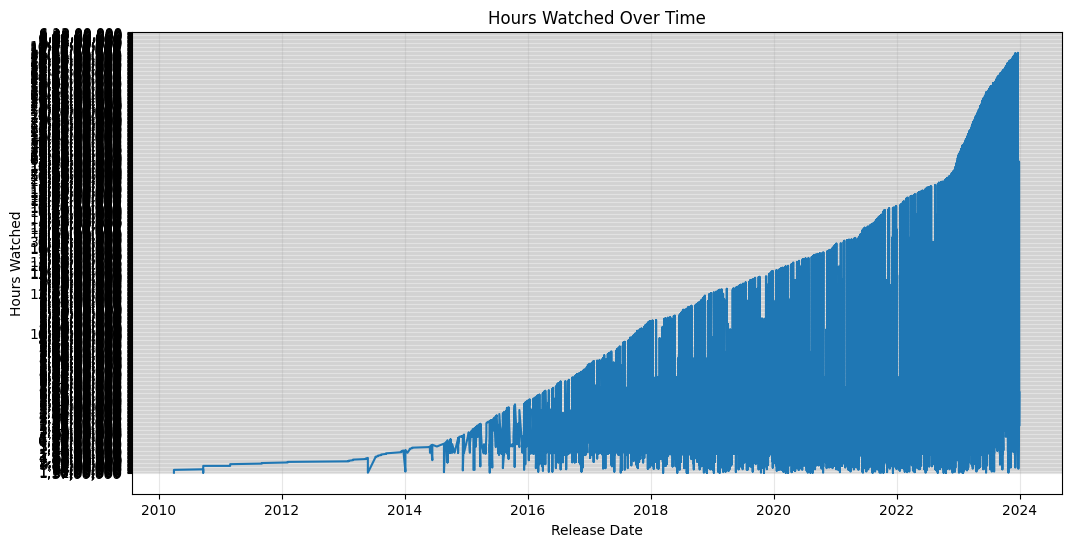

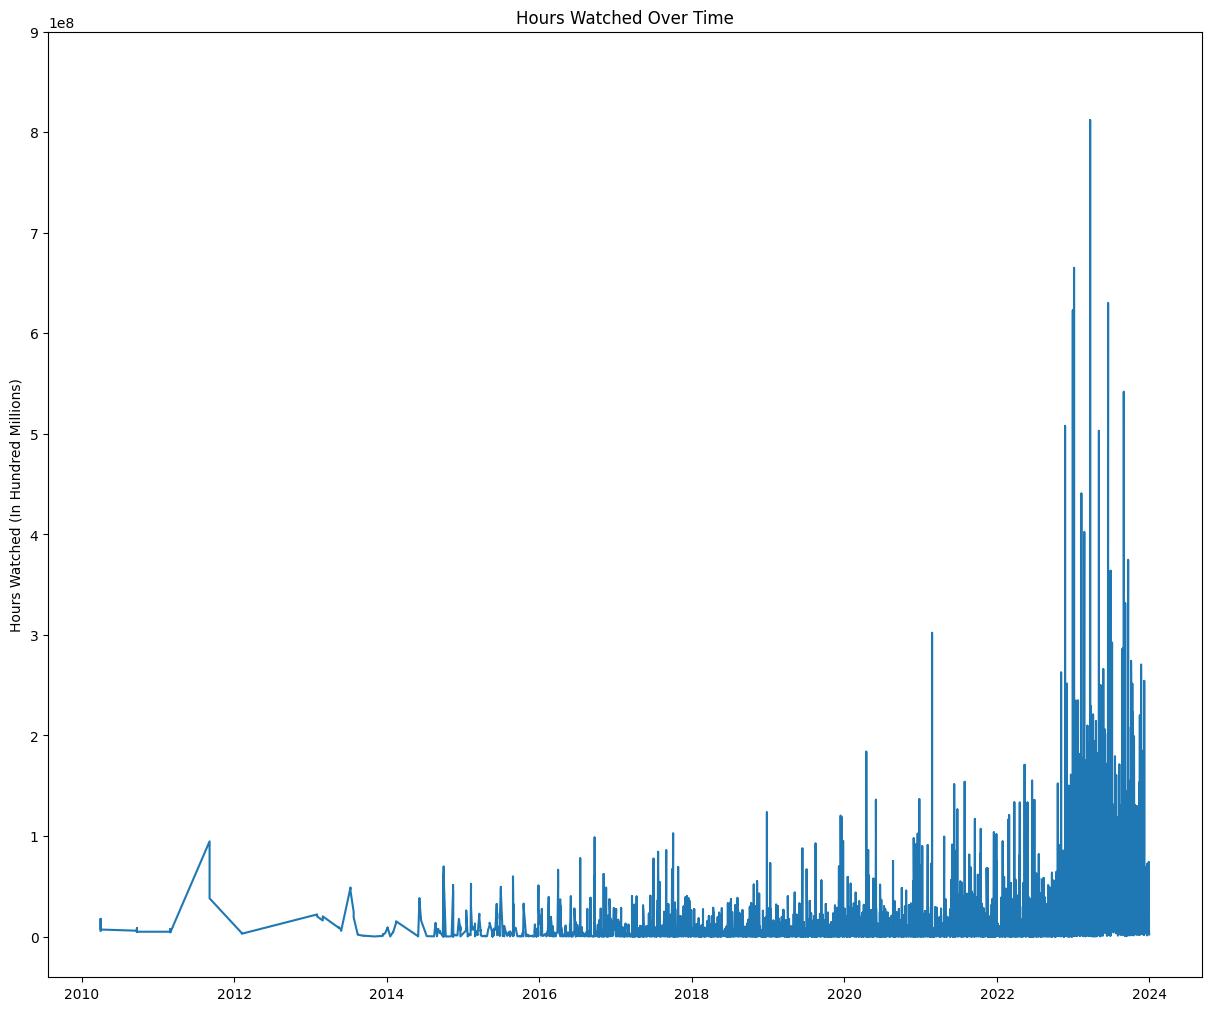

In [5]:
# Create a simple line plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Hours Viewed'])
plt.title('Hours Watched Over Time')
plt.xlabel('Release Date')
plt.ylabel("Hours Watched")
plt.grid(True, alpha=0.3)

fig, axs = plt.subplots(1, 1, figsize=(12, 10), layout='constrained')
print(type(df['Hours Viewed']))

sjs = df['Hours Viewed'].str.replace(',', '')
sjs = sjs.astype(int)

axs.plot(df.index, sjs)
axs.set_title('Hours Watched Over Time')
axs.set_yticks(np.arange(0, 1000000000, 1000000000/10))
axs.set_ylabel('Hours Watched (In Hundred Millions)')
#axs.set_yticklabels(fontdict={'fontsize': 10})

plt.show()

In [6]:
# Language Subsets
Englishdf = df[df['Language Indicator'] == "English"].copy()
Koreandf = df[df['Language Indicator'] == "Korean"].copy()
Japanesedf = df[df['Language Indicator'] == "Japanese"].copy()
Hindidf = df[df['Language Indicator'] == "Hindi"].copy()
Russiandf = df[df['Language Indicator'] == "Russian"].copy()
NonEnglishdf = df[df['Language Indicator'] == "Non-English"].copy()


#display(Englishdf)
#display(Koreandf)
#display(Japanesedf)
#display(Hindidf)
#display(Russiandf)
#display(NonEnglishdf)



([<matplotlib.patches.Wedge at 0x19715c93110>,
 [Text(-0.6351989279136638, 0.8980658784172418, 'English'),
  Text(-0.15271035341583533, -1.0893482216259458, 'Korean'),
  Text(0.37911436764930395, -1.0326046175772547, 'Japanese'),
  Text(0.6636367715472807, -0.8772606428253251, 'Russian'),
  Text(0.7085827381410881, -0.8413741755060458, 'Hindi'),
  Text(1.008062086050776, -0.4402395151130325, 'Non-English')])

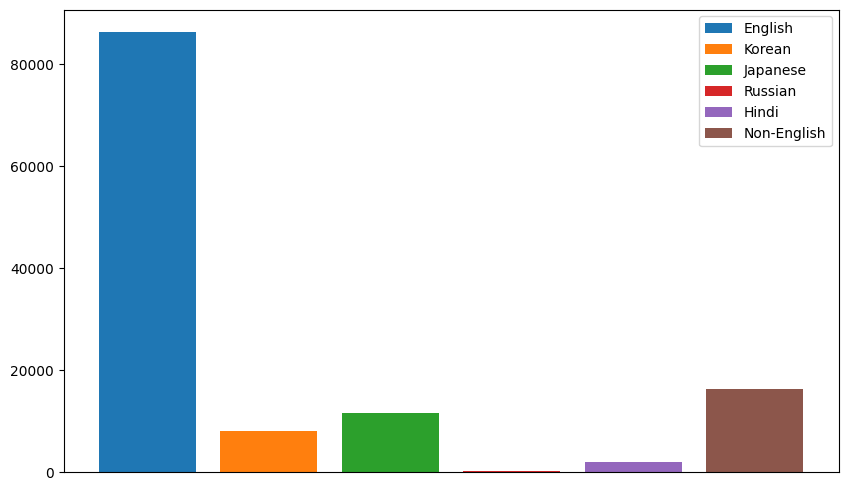

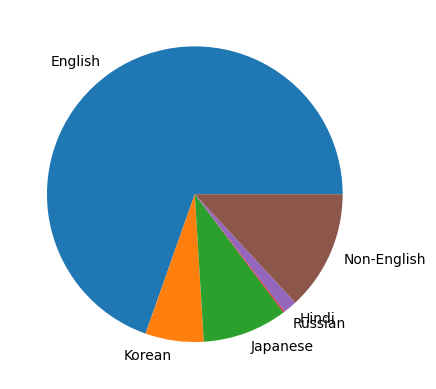

In [22]:
plt.figure(figsize=(10, 6))

width = .5
multiplier = 1.25
x = np.arange(1)

plt.bar(x, Englishdf.size, width, label='English')
plt.bar(x + (width * multiplier), Koreandf.size, width, label='Korean')
plt.bar(x + (width * 2 * multiplier), Japanesedf.size, width, label='Japanese')
plt.bar(x + (width * 3 * multiplier), Russiandf.size, width, label='Russian')
plt.bar((x + width * 4 * multiplier), Hindidf.size, width, label='Hindi')
plt.bar(x + (width * 5 * multiplier), NonEnglishdf.size, width, label='Non-English')
plt.xticks([])
plt.legend()

labels = 'English', 'Korean', 'Japanese', 'Russian', 'Hindi', 'Non-English'
sizes = Englishdf.size, Koreandf.size, Japanesedf.size, Russiandf.size, Hindidf.size, NonEnglishdf.size

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)



In [8]:
#Content Type Subsets
Moviedf = df[df['Content Type'] == "Movie"].copy()
Showdf = df[df['Content Type'] == "Show"].copy()

#display(Moviedf)
#display(Showdf)


([<matplotlib.patches.Wedge at 0x197163c25d0>,
 [Text(-0.23467559219441625, 1.0746754702830992, 'Movies'),
  Text(0.23467568614553258, -1.0746754497671023, 'Shows')])

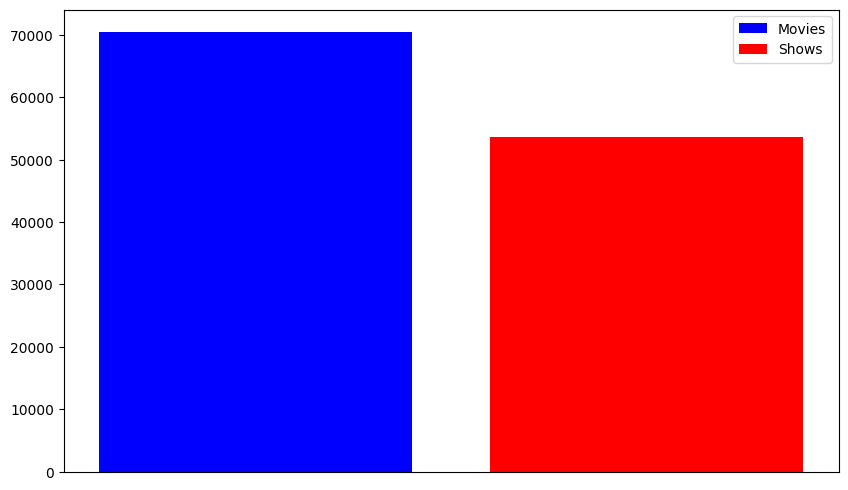

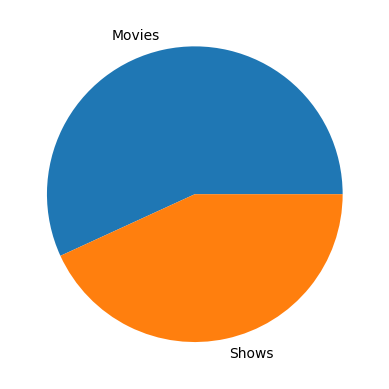

In [21]:
plt.figure(figsize=(10, 6))

width = .5
x = np.arange(1)

plt.bar(x, Moviedf.size, width, label='Movies', color='blue')
plt.bar(x + (width * 1.25), Showdf.size, width, label='Shows', color='red')

plt.xticks([])
plt.legend()

labels = "Movies", "Shows"
sizes = Moviedf.size, Showdf.size

fig,ax = plt.subplots()
ax.pie(sizes, labels=labels)





([<matplotlib.patches.Wedge at 0x19716129bd0>,
 [Text(0.3819894673359439, 1.0315444958141176, 'English(Movie)'),
  Text(-1.062758308595746, -0.2838041182060427, 'English(Show)'),
  Text(-0.2394354940450007, -1.0736250016609274, 'Korean(Movie)'),
  Text(-0.02102884571137533, -1.0997989760170026, 'Korean(Show)'),
  Text(0.21859416017685807, -1.0780614978453569, 'Japanese(Movie)'),
  Text(0.5185521125931885, -0.9701049976807363, 'Japanese(Show)'),
  Text(0.661635944416199, -0.8787706623781227, 'Russian(Movie)'),
  Text(0.6659673396854768, -0.87549271982824, 'Russian(Show)'),
  Text(0.6992722555342061, -0.8491279718865139, 'Hindi(Movie)'),
  Text(0.7386831379169662, -0.8150749792240862, 'Hindi(Show)'),
  Text(0.936599406000843, -0.5768722152078987, 'Non-English(Movie)'),
  Text(1.0891930959759981, -0.153812872277389, 'Non-English(Show)')])

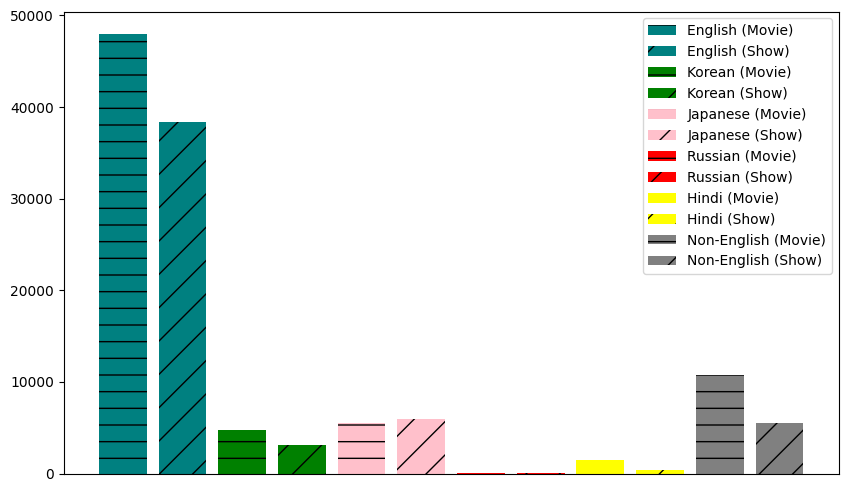

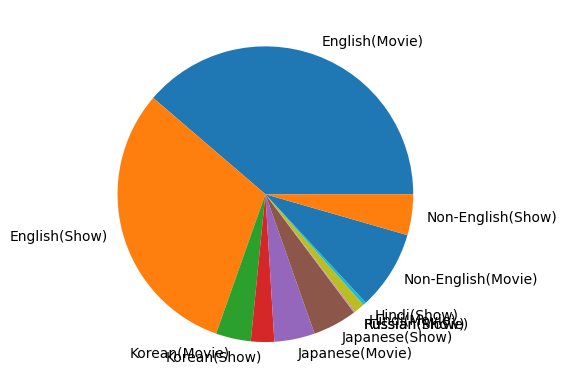

In [20]:
plt.figure(figsize=(10, 6))

width = .25
multiplier = 1.25
x = np.arange(1)
moviehatch = '-'
showhatch = '/'

plt.bar(x, Englishdf[Englishdf['Content Type'] == "Movie"].size, width, label='English (Movie)', hatch=moviehatch, color='teal')
plt.bar(x + width * multiplier, Englishdf[Englishdf['Content Type'] == "Show"].size, width, label='English (Show)', hatch=showhatch, color = 'teal')
plt.bar(x + (width * multiplier * 2), Koreandf[Koreandf['Content Type'] == "Movie"].size, width, label='Korean (Movie)', hatch=moviehatch, color='green')
plt.bar(x + (width * multiplier * 3), Koreandf[Koreandf['Content Type'] == "Show"].size, width, label='Korean (Show)', hatch=showhatch, color='green')
plt.bar(x + (width * 4 * multiplier), Japanesedf[Japanesedf['Content Type'] == "Movie"].size, width, label='Japanese (Movie)', hatch=moviehatch, color='pink')
plt.bar(x + (width * 5 * multiplier), Japanesedf[Japanesedf['Content Type'] == "Show"].size, width, label='Japanese (Show)', hatch=showhatch, color='pink')
plt.bar(x + (width * 6 * multiplier), Russiandf[Russiandf['Content Type'] == "Movie"].size, width, label='Russian (Movie)', hatch=moviehatch, color='red')
plt.bar(x + (width * 7 * multiplier), Russiandf[Russiandf['Content Type'] == "Show"].size, width, label='Russian (Show)', hatch=showhatch, color='red')
plt.bar((x + width * 8 * multiplier), Hindidf[Hindidf['Content Type'] == "Movie"].size, width, label='Hindi (Movie)', hatch=moviehatch, color='yellow')
plt.bar((x + width * 9 * multiplier), Hindidf[Hindidf['Content Type'] == "Show"].size, width, label='Hindi (Show)', hatch=showhatch, color='yellow')
plt.bar(x + (width * 10 * multiplier), NonEnglishdf[NonEnglishdf['Content Type'] == "Movie"].size, width, label='Non-English (Movie)', hatch=moviehatch, color='gray')
plt.bar(x + (width * 11 * multiplier), NonEnglishdf[NonEnglishdf['Content Type'] == "Show"].size, width, label='Non-English (Show)', hatch=showhatch, color='gray')


plt.xticks([])
plt.legend()

labels = 'English(Movie)', 'English(Show)', 'Korean(Movie)', 'Korean(Show)', 'Japanese(Movie)', "Japanese(Show)", 'Russian(Movie)', 'Russian(Show)', 'Hindi(Movie)', "Hindi(Show)", 'Non-English(Movie)', 'Non-English(Show)'
sizes = Englishdf[Englishdf['Content Type'] == "Movie"].size, Englishdf[Englishdf['Content Type'] == "Show"].size, Koreandf[Koreandf['Content Type'] == "Movie"].size, Koreandf[Koreandf['Content Type'] == "Show"].size, Japanesedf[Japanesedf['Content Type'] == "Movie"].size, Japanesedf[Japanesedf['Content Type'] == "Show"].size, Russiandf[Russiandf['Content Type'] == "Movie"].size, Russiandf[Russiandf['Content Type'] == "Show"].size, Hindidf[Hindidf['Content Type'] == "Movie"].size, Hindidf[Hindidf['Content Type'] == "Show"].size, NonEnglishdf[NonEnglishdf['Content Type'] == "Movie"].size, NonEnglishdf[NonEnglishdf['Content Type'] == "Show"].size

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)


In [11]:
Globaldf = df[df['Available Globally?'] == "Yes"].copy()
NotGlobaldf = df[df['Available Globally?'] == "No"].copy()

#display(Globaldf)
#display(NotGlobaldf)

([<matplotlib.patches.Wedge at 0x19715bce710>,
 [Text(0.6230889009207602, 0.9065099125488697, 'Global'),
  Text(-0.6230887136067275, -0.9065100412989994, 'Not Global')])

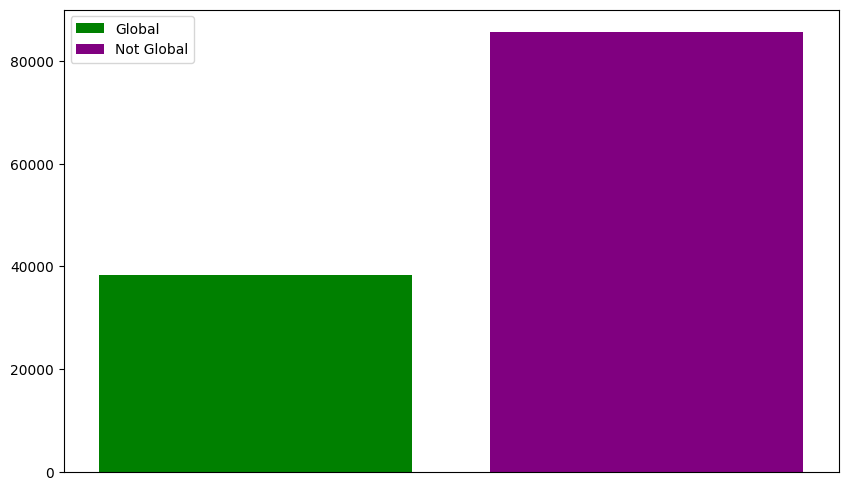

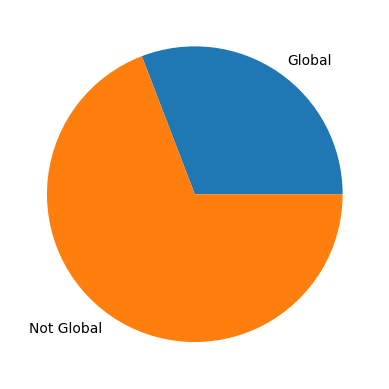

In [19]:
plt.figure(figsize=(10, 6))

width = .5
x = np.arange(1)

plt.bar(x, Globaldf.size, width, label='Global', color='green')
plt.bar(x + (width * 1.25), NotGlobaldf.size, width, label='Not Global', color='purple')

plt.xticks([])
plt.legend()

labels = 'Global', 'Not Global'
sizes = Globaldf.size, NotGlobaldf.size

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)


([<matplotlib.patches.Wedge at 0x19715ba0690>,
 [Text(0.8010908830537953, 0.7538258400241336, 'English(Global)'),
  Text(-1.078033941156427, 0.21873002014982176, 'English(Not Global)'),
  Text(-0.3072806676275444, -1.056209539486541, 'Korean(Global)'),
  Text(-0.09098369478394387, -1.096230800189204, 'Korean(Not Global)'),
  Text(0.11206269370918906, -1.0942769085924462, 'Japanese(Global)'),
  Text(0.42114432656189704, -1.016187707170642, 'Japanese(Not Global)'),
  Text(0.6597424897842987, -0.8801930738043868, 'Russian(Global)'),
  Text(0.664080514007056, -0.8769247806489018, 'Russian(Not Global)'),
  Text(0.6809430362375284, -0.8638961635518566, 'Hindi(Global)'),
  Text(0.7210735405835315, -0.8306942572754012, 'Hindi(Not Global)'),
  Text(0.824915320719988, -0.727677616559311, 'Non-English(Global)'),
  Text(1.047198674059503, -0.3367119496662081, 'Non-English(Not Global)')])

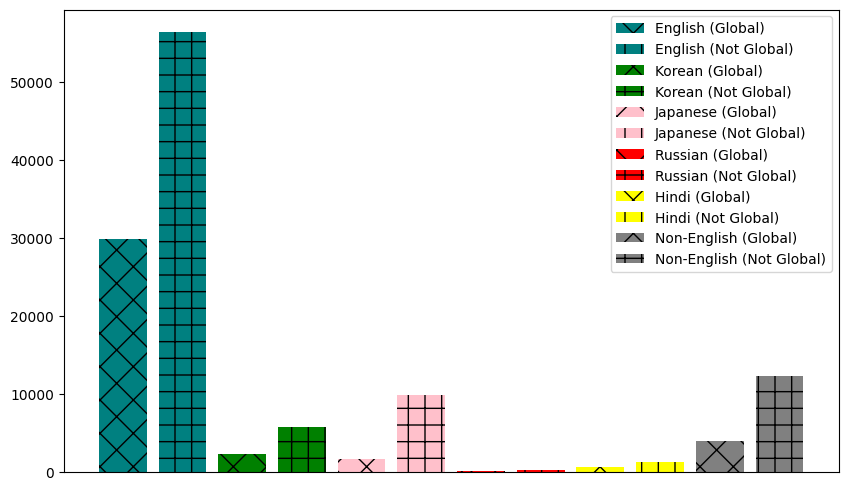

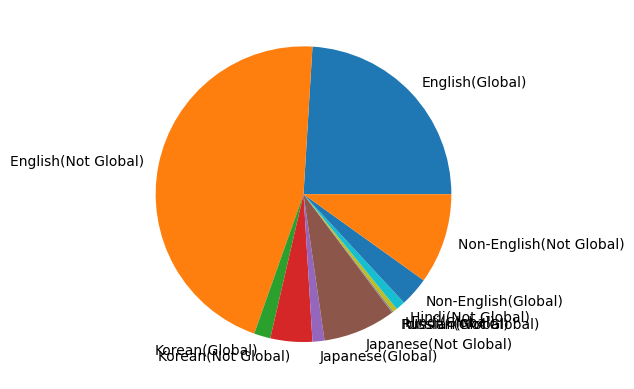

In [18]:
plt.figure(figsize=(10, 6))

width = .25
multiplier = 1.25
x = np.arange(1)
moviehatch = 'x'
showhatch = '+'

plt.bar(x, Englishdf[Englishdf['Available Globally?'] == "Yes"].size, width, label='English (Global)', hatch=moviehatch,
        color='teal')
plt.bar(x + width * multiplier, Englishdf[Englishdf['Available Globally?'] == "No"].size, width, label='English (Not Global)',
        hatch=showhatch, color='teal')
plt.bar(x + (width * multiplier * 2), Koreandf[Koreandf['Available Globally?'] == "Yes"].size, width, label='Korean (Global)',
        hatch=moviehatch, color='green')
plt.bar(x + (width * multiplier * 3), Koreandf[Koreandf['Available Globally?'] == "No"].size, width, label='Korean (Not Global)',
        hatch=showhatch, color='green')
plt.bar(x + (width * 4 * multiplier), Japanesedf[Japanesedf['Available Globally?'] == "Yes"].size, width,
        label='Japanese (Global)', hatch=moviehatch, color='pink')
plt.bar(x + (width * 5 * multiplier), Japanesedf[Japanesedf['Available Globally?'] == "No"].size, width,
        label='Japanese (Not Global)', hatch=showhatch, color='pink')
plt.bar(x + (width * 6 * multiplier), Russiandf[Russiandf['Available Globally?'] == "Yes"].size, width,
        label='Russian (Global)', hatch=moviehatch, color='red')
plt.bar(x + (width * 7 * multiplier), Russiandf[Russiandf['Available Globally?'] == "No"].size, width,
        label='Russian (Not Global)', hatch=showhatch, color='red')
plt.bar((x + width * 8 * multiplier), Hindidf[Hindidf['Available Globally?'] == "Yes"].size, width, label='Hindi (Global)',
        hatch=moviehatch, color='yellow')
plt.bar((x + width * 9 * multiplier), Hindidf[Hindidf['Available Globally?'] == "No"].size, width, label='Hindi (Not Global)',
        hatch=showhatch, color='yellow')
plt.bar(x + (width * 10 * multiplier), NonEnglishdf[NonEnglishdf['Available Globally?'] == "Yes"].size, width,
        label='Non-English (Global)', hatch=moviehatch, color='gray')
plt.bar(x + (width * 11 * multiplier), NonEnglishdf[NonEnglishdf['Available Globally?'] == "No"].size, width,
        label='Non-English (Not Global)', hatch=showhatch, color='gray')

plt.xticks([])
plt.legend()

labels = 'English(Global)', 'English(Not Global)', 'Korean(Global)', 'Korean(Not Global)', 'Japanese(Global)', "Japanese(Not Global)", 'Russian(Global)', 'Russian(Not Global)', 'Hindi(Global)', "Hindi(Not Global)", 'Non-English(Global)', 'Non-English(Not Global)'
sizes = Englishdf[Englishdf['Available Globally?'] == "Yes"].size, Englishdf[Englishdf['Available Globally?'] == "No"].size, Koreandf[Koreandf['Available Globally?'] == "Yes"].size, Koreandf[Koreandf['Available Globally?'] == "No"].size, Japanesedf[Japanesedf['Available Globally?'] == "Yes"].size, Japanesedf[Japanesedf['Available Globally?'] == "No"].size, Russiandf[Russiandf['Available Globally?'] == "Yes"].size, Russiandf[Russiandf['Available Globally?'] == "No"].size, Hindidf[Hindidf['Available Globally?'] == "Yes"].size, Hindidf[Hindidf['Available Globally?'] == "No"].size, NonEnglishdf[NonEnglishdf['Available Globally?'] == "Yes"].size, NonEnglishdf[NonEnglishdf['Available Globally?'] == "No"].size

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)



